

# Project: Investigate a Dataset (TMDB movies)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
   - Which year has the highest release of movies?
   - What are the top 20 most expensive movies?
   - which Movies with Highest And Lowest Votes?
   - How do ratings correlate with commercial success (profits)?
   - What is the average runtime of all movies?
### TMDB movies
   
   #### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data=pd.read_csv ("tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assess Data

In [3]:
data.shape

(10866, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
data.budget.value_counts()

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      165
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

In [7]:
data.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
13000000        5
20000000        5
14000000        5
30000000        5
7000000         4
4300000         4
4000000         4
1000000         4
50000000        4
25000000        4
60000000        3
6700000         3
11              3
16000000        3
15              3
29000000        3
21000000        3
100000000       3
102000000       3
3               3
16              3
2500000         3
70000000        3
             ... 
42721196        1
79958599        1
40084041        1
442965          1
50752337        1
30857814        1
1400000         1
7027290         1
303788635       1
10300000        1
45916769        1
26049082        1
211989043       1
41009669        1
346079773       1
4729352         1
23159305        1
272742922       1
525             1
2626800         1
39946780        1
3117985         1
22270           1
65884703        1
4500000   

In [8]:
data.runtime.value_counts()

90     547
95     358
100    335
93     328
97     306
96     300
91     297
94     292
92     270
98     270
88     270
89     253
105    250
101    232
99     231
102    228
85     227
103    212
87     211
106    211
108    205
104    201
86     197
107    194
110    194
112    152
84     142
120    140
111    140
109    140
      ... 
294      1
366      1
470      1
550      1
566      1
31       1
500      1
372      1
292      1
252      1
257      1
417      1
561      1
705      1
34       1
194      1
210      1
226      1
242      1
250      1
282      1
338      1
19       1
51       1
223      1
235      1
20       1
220      1
236      1
219      1
Name: runtime, Length: 247, dtype: int64

### Tidiness Issues
    - Drop duplicate Rows.
### Quality
    - Drop unnecessary columns:imdb_id,homepage,keywords,tag_line,overview,revenue_adj,budget_adj.
    - Wrong data types (id need to convert to string).
    - Wrong data types (relase_date need to convert to datetime).
    - Drop the movies which are having zero value of budget and revenue.
    - Drop the movies which having missing data (cast,director,geners,production_companies).
    


### Data Cleaning 
#### Tidiness Issues

#### Define:
  - Removing duplicates rows from dataset.


#### Code:

In [9]:
data.drop_duplicates(inplace=True)

#### Test:

In [10]:
data.shape

(10865, 21)

#### Quality


#### Define:
   - removing unnecessary columns:imdb_id,homepage,keywords,tag_line,overview,revenue_adj,budget_adj.

#### Code:

In [11]:
data.drop(['imdb_id','homepage','keywords','tagline','overview','revenue_adj','budget_adj'],axis=1,inplace=True)

#### Test:

In [12]:
data.shape

(10865, 14)

#### Define:
  - converting id to string.

#### Code:

In [13]:
data['id']=str(data['id'])

#### Test:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


#### Define:
   - converting relase_date to datatime

#### Code:

In [15]:
data['release_date']=pd.to_datetime(data['release_date'])

#### Test:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 1.2+ MB


#### Define:
   - removing movies with zero values in budget and revenue.

#### Code:

In [17]:
data=data[data['budget']!=0]
data=data[data['revenue']!=0]


#### Test:

In [18]:
data.shape


(3854, 14)

#### Define:
   - removing missing data in cast,director,geners,production_companies.

#### Code:

In [19]:
data=data[data.cast.notnull()]
data=data[data.director.notnull()]
data=data[data.production_companies.notnull()]

#### Test:

In [20]:
data.shape

(3805, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null object
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 445.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which year has the highest release of movies?)

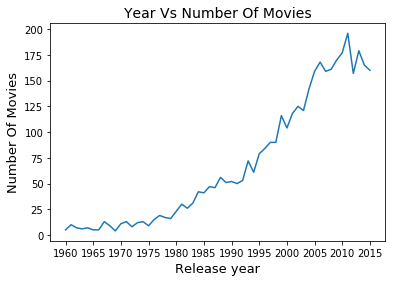

In [22]:

data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


#### Movies number increase year by year but after 2010 it start decreases, by calculations that year 2010 has the highest release of movies.

### Research Question 2  (What are the top 20 most expensive movies?)

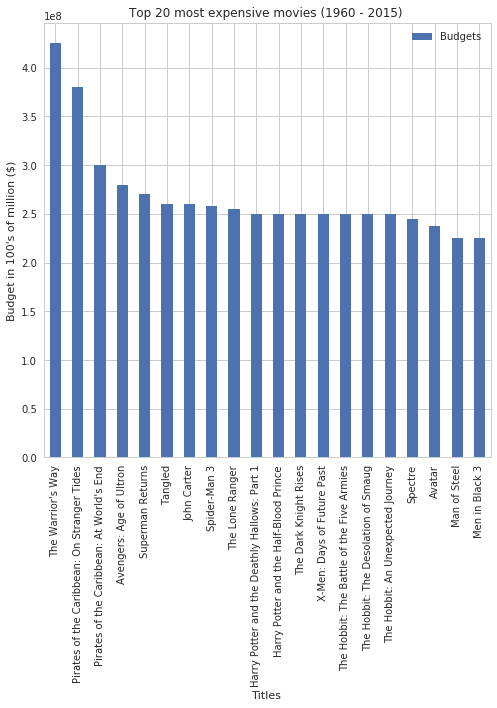

In [23]:
sorted_budget = data['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(data.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 most expensive movies (1960 - 2015) ');
plt.ylabel('Budget in 100\'s of million ($)');


#### The top 20 most expensive movies ("The Warrior's Way", 'Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron', 'Superman Returns', 'Tangled', 'John Carter', 'Spider-Man 3', 'The Lone Ranger', 'Harry Potter and the Deathly Hallows: Part 1', 'Harry Potter and the Half-Blood Prince', 'The Dark Knight Rises', 'X-Men: Days of Future Past', 'The Hobbit: The Battle of the Five Armies', 'The Hobbit: The Desolation of Smaug', 'The Hobbit: An Unexpected Journey', 'Spectre', 'Avatar', 'Man of Steel', 'Men in Black 3'). 

### Research Question 3  (which Movies with Highest And Lowest Votes?)

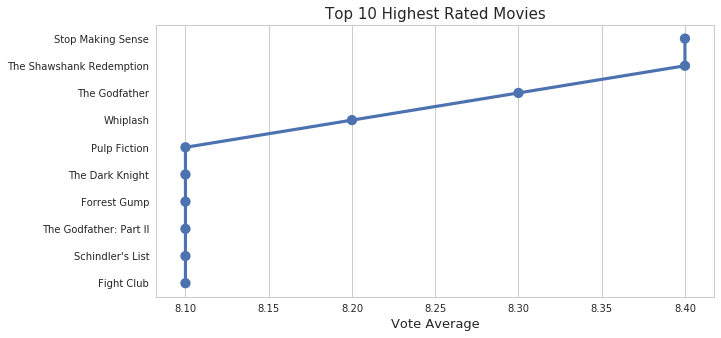

In [24]:
info = pd.DataFrame(data['vote_average'].sort_values(ascending = False))
info['original_title'] = data['original_title']
d = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(d[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")



#### The top highest rated movies ('Stop Making Sense', 'The Shawshank Redemption', 'The Godfather', 'Whiplash', 'Pulp Fiction', 'The Dark Knight', 'Forrest Gump', 'The Godfather: Part II', "Schindler's List", 'Fight Club').

### Research Question 4  (How do ratings correlate with commercial success (profits)?)

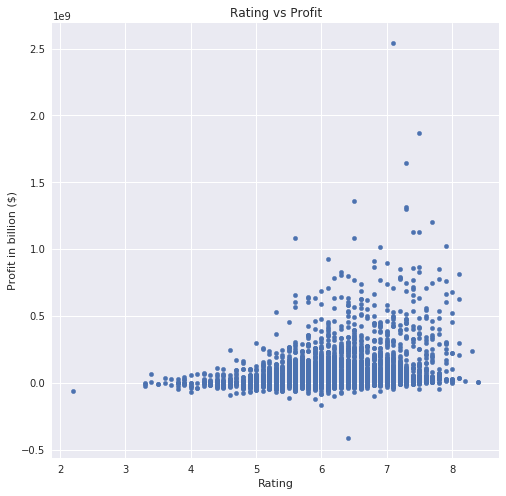

In [25]:
d=data
d['Profit']=d['revenue']-d['budget']
d.plot(x='vote_average',y='Profit',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion ($)');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

#### Movies with high ratting have the highest profit.

#### Research Question 5 (What is the average runtime of all movies?)

In [26]:
def average_func(column_name):
    
    return data[column_name].mean()
average_func('runtime')

109.35111695137977

##### The average runtime of all movies in this dataset is 109 mins approx.

<a id='conclusions'></a>
## Conclusions



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Conclusions
   -  2010 year has the highest release of movies.
   -  "The Warrior's Way" is the most expensive movie.
   -  " Stop Making Sense" is the highest ratting movie.
   -  The average runtime of all movies in this dataset is 109 mins approx.

### Limitation
   - Units of revenue and budget column: I am not sure that the budgets and revenues all in US dollars? 
   - the results can only be treated as indicators and are not generalizable.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0